# Stage One: Import your selected structured CSV data 

I used the pandas library to import a data set showing the releases and ratings of Marvel vs. DC movies over time. Source: https://www.kaggle.com/leonardopena/marvel-vs-dc 

In [1]:
import pandas as pd
df = pd.read_csv('marveldc.csv')
print(df.dtypes)

Unnamed: 0               int64
Original Title          object
Company                 object
Rate                   float64
Metascore                int64
Minutes                 object
Release                  int64
Budget                  object
Opening Weekend USA      int64
Gross�USA                int64
Gross Worldwide          int64
dtype: object


# Stage Two: Use Pandas to note any preliminary trends in the CSV as a dataframe

I used pandas to emphasize certain aspects of the data frame, like the release year and company. I ran into some trouble with the structure of the dataset, because movies were chronological but grouped by company. Meaning, when I printed for release year, only Marvel movies came up in the first part of the dataset, and DC in the last part. I then showed movies released in the later years of the dataset (2017 and 2019), when movies became more frequent.  Most interestingly, I compared the average IMDB ratings of both companies, showing that Marvel movies were ranked higher overall by users. 

In [25]:
print(df[['Original Title','Company']].head())

                             Original Title Company
Release                                            
2008                               Iron Man  Marvel
2008                    The Incredible Hulk  Marvel
2010                             Iron Man 2  Marvel
2011                                   Thor  Marvel
2011     Captain America: The First Avenger  Marvel


In [28]:
df = pd.read_csv('marveldc.csv')
df = df.set_index('Release')
df.tail()

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Budget,Opening Weekend USA,Gross�USA,Gross Worldwide
Release,,,,,,,,,,
2017,35,Wonder Woman,DC,7.4,76,141,149000000,103251471,412563408,821847012
2017,36,Justice League,DC,6.4,45,120,300000000,93842239,229024295,657924295
2018,37,Aquaman,DC,7.0,55,143,160000000,67873522,335061807,1148161807
2019,38,Shazam!,DC,7.1,71,132,100000000,53505326,140371656,364571656
2019,39,Joker,DC,8.7,59,122,55000000�,96202337,333204580,1060504580


In [15]:
df.loc[2017]

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Budget,Opening Weekend USA,Gross�USA,Gross Worldwide
Release,,,,,,,,,,
2017,15,Guardians of the Galaxy Vol. 2,Marvel,7.6,67,136,200000000,146510104,389813101,863756051
2017,16,Spider-Man: Homecoming,Marvel,7.4,73,133,175000000�,117027503,334201140,880166924
2017,17,Thor:Ragnarok,Marvel,7.9,74,130,180000000,122744989,315058289,853977126
2017,35,Wonder Woman,DC,7.4,76,141,149000000,103251471,412563408,821847012
2017,36,Justice League,DC,6.4,45,120,300000000,93842239,229024295,657924295


In [27]:
df.loc[2019, 'Original Title']

Release
2019                Captain Marve
2019            Avengers: Endgame
2019    Spider-Man: Far from Home
2019                      Shazam!
2019                        Joker
Name: Original Title, dtype: object

In [13]:
company = df.groupby('Company')
company.get_group('DC')

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Budget,Opening Weekend USA,Gross�USA,Gross Worldwide
Release,,,,,,,,,,
2004,24,Catwoman,DC,3.3,27,104,100000000,16728411,40202379,82102379
2005,25,Batman Begins,DC,8.2,70,140,150000000,48745440,206852432,373413297
2006,26,Superman Returns,DC,6.0,72,154,270000000,52535096,200081192,391081192
2008,27,The Dark Knight,DC,9.0,84,152,185000000,158411483,535234033,1004934033
2009,28,Watchmen,DC,7.6,56,162,130000000,55214334,107509799,185258983
2010,29,Jonah Hex�,DC,4.7,33,81,47000000�,5379365,10547117,10903312
2011,30,Green Lantern,DC,5.5,39,114,200000000,53174303,116601172,219851172
2012,31,The Dark Knight Rises,DC,8.4,78,164,250000000,160887295,448139099,1081041287
2013,32,Man of Steel,DC,7.1,55,143,225000000,116619362,291045518,668045518


In [7]:
company['Rate'].mean()

Company
DC        6.806250
Marvel    7.478261
Name: Rate, dtype: float64

# Stage Three: Use "group by" to break down at least two different subsets of data

I grouped the dataset by release year and company, to show trends over time of how many movies each company released, showing an upward trend in how many movies the companies released as time went on. 

In [17]:
company_comparison = df.groupby(['Release','Company'])['Original Title'].count()
company_comparison

Release  Company
2004     DC         1
2005     DC         1
2006     DC         1
2008     DC         1
         Marvel     2
2009     DC         1
2010     DC         1
         Marvel     1
2011     DC         1
         Marvel     2
2012     DC         1
         Marvel     1
2013     DC         1
         Marvel     2
2014     Marvel     2
2015     Marvel     2
2016     DC         2
         Marvel     2
2017     DC         2
         Marvel     3
2018     DC         1
         Marvel     3
2019     DC         2
         Marvel     3
Name: Original Title, dtype: int64

# Stage Five: Use one additional form of analysis or visualization from any we've tried so far

Continuing my work from the previous stage, I visualized this upward trend in movie releases and showed the increase in movie releases by comic book companies from 2004-2019. As a note, I would have liked to do some sort of visualization of the movies ratings. However, since ratings are specific to the decimal point, there were too many datapoints and it was hard to show trends. 

Company
DC        AxesSubplot(0.125,0.125;0.775x0.755)
Marvel    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Original Title, dtype: object

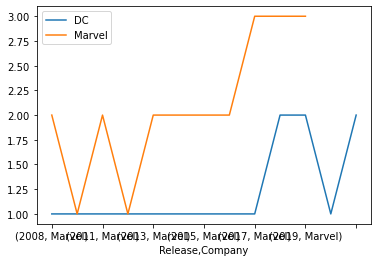

In [18]:
company_comparison.groupby(['Company']).plot(legend=True)